markdown 　# Pythonチャレンジ：地震データを探る 　このプロジェクトでは、USGS（アメリカ地質調査所）のAPIを使ってリアルタイムの地震データを取得し、世界中の地震を可視化・分析します。 　

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7295 entries, 0 to 7294
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             7295 non-null   object 
 1   latitude         7295 non-null   float64
 2   longitude        7295 non-null   float64
 3   depth            7295 non-null   float64
 4   mag              7295 non-null   float64
 5   magType          7295 non-null   object 
 6   nst              6142 non-null   float64
 7   gap              6142 non-null   float64
 8   dmin             6141 non-null   float64
 9   rms              7293 non-null   float64
 10  net              7295 non-null   object 
 11  id               7295 non-null   object 
 12  updated          7295 non-null   object 
 13  place            7295 non-null   object 
 14  type             7295 non-null   object 
 15  horizontalError  5820 non-null   float64
 16  depthError       7292 non-null   float64
 17  magError      

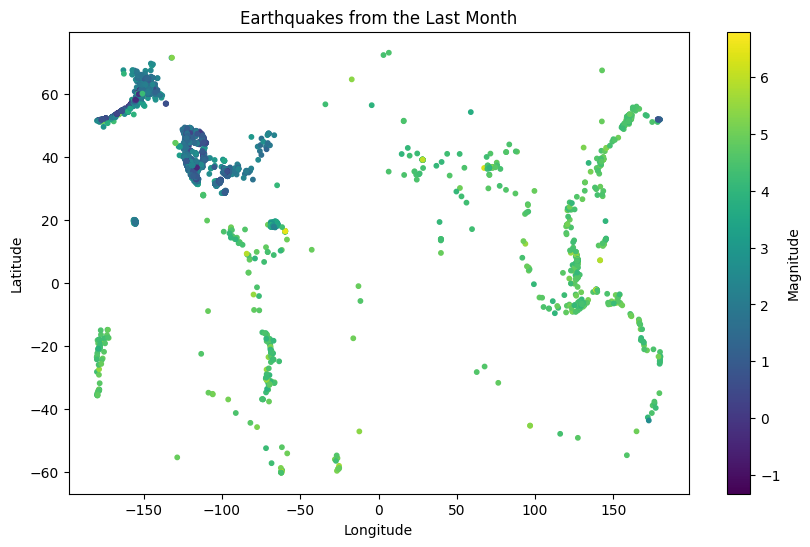

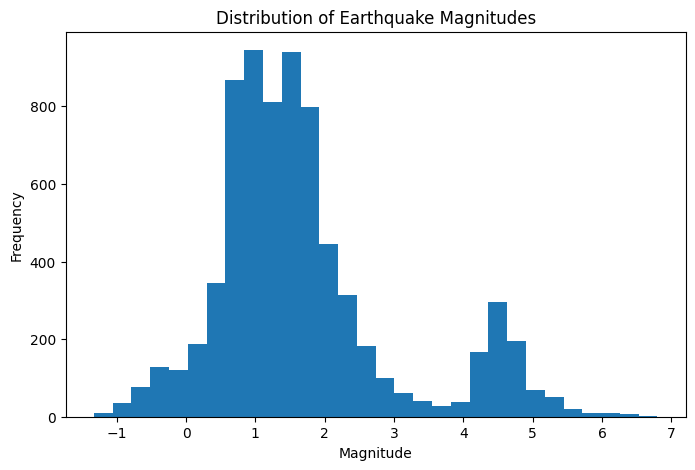

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import requests

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
data = pd.read_csv(url)
data.head()

data.info()
data.describe()

plt.figure(figsize=(10,6))
plt.scatter(data['longitude'], data['latitude'], c=data['mag'], cmap='viridis', s=10)
plt.colorbar(label='Magnitude')
plt.title('Earthquakes from the Last Month')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.figure(figsize=(8,5))
plt.hist(data['mag'].dropna(), bins=30)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()



## 考察（サマリー）

本課題では、USGS（アメリカ地質調査所）が公開する地震データをPythonで取得し、pandasやmatplotlibを用いて分析・可視化を行った。データの取得からグラフ作成までの一連の流れを通して、データサイエンスの基礎的な手法を実践的に理解することができた。分析の結果、地震は主にプレート境界付近、特に日本列島や太平洋周辺
